# Clase 6, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Obtener datos diarios, tesla y apple

In [2]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT',
           'BRK-A', 'NVDA', 'NFLX', 'WMT',
           'JPM', 'XOM', 'V', 'MA', 'TSLA', 'PEP', 'PG']
start_date = '2017-01-01'
end_date = '2023-12-31'
df = yf.download(tickers, start=start_date, end=end_date)['Close']
rt = df.pct_change()

[*********************100%%**********************]  16 of 16 completed


In [3]:
# Grafica las acciones
df = pd.DataFrame({
    "vol": rt.std() * 252**(1/2),
    "rend": rt.mean() * 252

})

Text(0, 0.5, 'rendimiento')

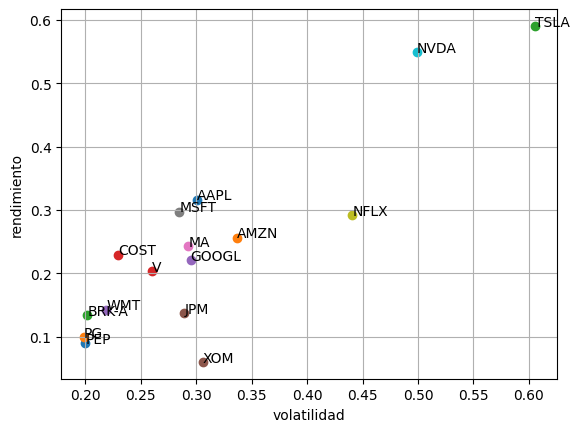

In [4]:
for i in range(len(df)):
    flag = df.iloc[i]
    plt.scatter(flag.vol, flag.rend)
    plt.text(flag.vol, flag.rend, df.index[i])
plt.grid()
plt.xlabel("volatilidad")
plt.ylabel("rendimiento")

### Obtenga la regresión lineal usando sklearn

In [5]:
from sklearn.linear_model import LinearRegression

Si modelamos la relacion entre volatilidad y riesgo de forma lineal, tenemos la siguiente ecuación:

$E[x] = \theta_0 + \theta_1 \sigma $

In [6]:
X = df[["vol"]]
y = df[["rend"]]

model = LinearRegression().fit(X, y)

In [7]:
# ¿Cuál es el intercepto?
model.intercept_

array([-0.11502096])

In [8]:
# ¿Cuál es el coeficiente?
model.coef_

array([[1.15016015]])

Escriba la ecuación del modelo

$$rendimiento = -0.007$$

Grafique el modelo con la gráfica anterior

In [9]:
df["predicciones"]=model.predict(X)
df.head()

,vol,rend,predicciones
Ticker,,,
AAPL,0.300911,0.316421,0.231075
AMZN,0.336948,0.256470,0.272523
BRK-A,0.201660,0.133791,0.116921
COST,0.229505,0.229754,0.148946
GOOGL,0.294806,0.221293,0.224053


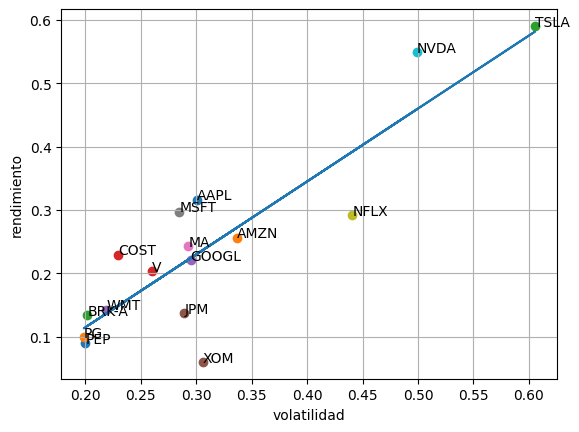

In [10]:
for i in range(len(df)):
    flag = df.iloc[i]
    plt.scatter(flag.vol, flag.rend)
    plt.text(flag.vol, flag.rend, df.index[i])
plt.grid()
plt.xlabel("volatilidad")
plt.ylabel("rendimiento")
plt.plot(df.vol, df.predicciones)

¿A mayor volatilidad, mayor rendimiento esperado?